In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# List files in your MyDrive
zip_dir = "/content/drive/MyDrive"
files = os.listdir(zip_dir)

print("Files in MyDrive:")
for file in files:
    print(file)

Files in MyDrive:
PCS_1645 ok .jpg
Classroom
1. Module 1 Daily Exercise 1.gdoc
English assignment.gdoc
PDF Gallery_20220903_090547.gdoc
Python programming.gdoc
Communication Style (2).gdoc
ASSIGNMENT PYTHON LOOPS SET – 3 Q& A.gdoc
iot assignment 2.gdoc
Python list assignment.pdf
test1-01 (1) (2).gdoc
test1-01 (1) (1).gdoc
E0122041_CA1_ENG (2).pdf
E0122041_CA1_ENG (1).pdf
E0122041_CA1_ENG.pdf
5790d37e-affe-4e95-a2be-2a3395b59c17.pdf
sret subjects.url
PYTHON FUNCTION ASSIGNMENT.gdoc
Communication Style (1).gdoc
Communication Style.gdoc
Copy of IOT ASSIGNMENT 2.pdf
HEMANTH's Notebook.url
PYTHON IMPORTANT QUESTION BANK(.gdoc
Communication Style.pdf
Copy of English assignment.gdoc
Copy of CA 2 (2).gdoc
Copy of CA 2 (1).gdoc
Copy of CA 2.gdoc
HEMANTH P BTech_AIML - Spot the Grammar Mistakes.gdoc
Copy of HEMANTH P BTech_AIML - Spot the Grammar Mistakes.gdoc
test1-01 (1).gdoc
E0122041_CA4_CSE120 (1).pdf
E0122041_CA4_CSE120.pdf
Revision 1 Assignment (Nov 12, 2022 6:02:56 PM).jpeg
java String pr

In [ ]:
import zipfile
import os

# Path to your ZIP file
zip_path = "/content/drive/MyDrive/Flair_Mri/Flair_Mri.zip"

# Path where you want to extract it
extract_path = "/content/Flair_Mri"  # We'll unzip to Colab workspace (not Drive)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Unzipped successfully to", extract_path)

✅ Unzipped successfully to /content/Flair_Mri


In [ ]:
# Check the extracted folder contents
for root, dirs, files in os.walk("/content/Flair_Mri"):
    print("📂 Folder:", root)
    for file in files[:]:  # Show up to 10 files
        print("   📄", file)

📂 Folder: /content/Flair_Mri
📂 Folder: /content/Flair_Mri/kaggle_3m
   📄 data.csv
   📄 README.md
📂 Folder: /content/Flair_Mri/kaggle_3m/TCGA_FG_8189_20030516
   📄 TCGA_FG_8189_20030516_3_mask.tif
   📄 TCGA_FG_8189_20030516_21_mask.tif
   📄 TCGA_FG_8189_20030516_37.tif
   📄 TCGA_FG_8189_20030516_33_mask.tif
   📄 TCGA_FG_8189_20030516_4.tif
   📄 TCGA_FG_8189_20030516_30_mask.tif
   📄 TCGA_FG_8189_20030516_36.tif
   📄 TCGA_FG_8189_20030516_35.tif
   📄 TCGA_FG_8189_20030516_19_mask.tif
   📄 TCGA_FG_8189_20030516_54_mask.tif
   📄 TCGA_FG_8189_20030516_14_mask.tif
   📄 TCGA_FG_8189_20030516_34.tif
   📄 TCGA_FG_8189_20030516_21.tif
   📄 TCGA_FG_8189_20030516_45_mask.tif
   📄 TCGA_FG_8189_20030516_34_mask.tif
   📄 TCGA_FG_8189_20030516_41_mask.tif
   📄 TCGA_FG_8189_20030516_26.tif
   📄 TCGA_FG_8189_20030516_53_mask.tif
   📄 TCGA_FG_8189_20030516_50_mask.tif
   📄 TCGA_FG_8189_20030516_43.tif
   📄 TCGA_FG_8189_20030516_41.tif
   📄 TCGA_FG_8189_20030516_9.tif
   📄 TCGA_FG_8189_20030516_44.tif
   

100%|██████████| 112/112 [00:03<00:00, 32.39it/s]


Images shape: (1373, 256, 256, 1)
Masks shape: (1373, 256, 256, 1)


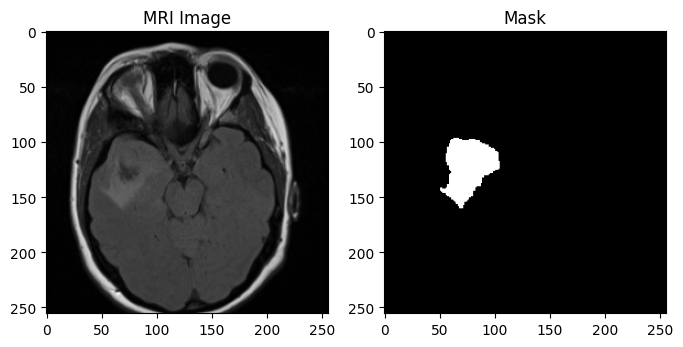

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Base path where patient folders are located
base_path = '/content/Flair_Mri/kaggle_3m'

# Initialize lists
images = []
masks = []

# Loop through each patient folder
for patient_folder in tqdm(sorted(os.listdir(base_path))):
    patient_path = os.path.join(base_path, patient_folder)

    # Skip files like README.md and data.csv
    if not os.path.isdir(patient_path):
        continue

    for file in sorted(os.listdir(patient_path)):
        if file.endswith('.tif') and '_mask' not in file:
            image_path = os.path.join(patient_path, file)
            mask_path = image_path.replace('.tif', '_mask.tif')

            # Check if mask exists for the image
            if os.path.exists(mask_path):
                # Load images (grayscale)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

                # Resize both to 256x256
                image = cv2.resize(image, (256, 256))
                mask = cv2.resize(mask, (256, 256))

                # Normalize image (0-1)
                image = image / 255.0

                # Skip slices where mask is completely empty
                if np.sum(mask) == 0:
                  continue

                # Binarize mask (0 or 1)
                mask = (mask > 127).astype(np.float32)

                images.append(image)
                masks.append(mask)

# Convert to numpy arrays and reshape for model input
images = np.array(images).reshape(-1, 256, 256, 1)
masks = np.array(masks).reshape(-1, 256, 256, 1)

print("Images shape:", images.shape)
print("Masks shape:", masks.shape)

# Show one random example to verify
idx = np.random.randint(0, len(images))
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(images[idx].squeeze(), cmap='gray')
plt.title("MRI Image")
plt.subplot(1,2,2)
plt.imshow(masks[idx].squeeze(), cmap='gray')
plt.title("Mask")
plt.show()


In [ ]:
print("Unique values in first mask:", np.unique(masks[0]))
print("Unique values in second mask:", np.unique(masks[1]))
print("Unique values in third mask:", np.unique(masks[2]))
print("Unique values in third mask:", np.unique(masks[50]))

Unique values in first mask: [0. 1.]
Unique values in second mask: [0. 1.]
Unique values in third mask: [0. 1.]
Unique values in third mask: [0. 1.]


In [ ]:

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# --- Split dataset ---
X_train, X_val, y_train, y_val = train_test_split(images, masks, test_size=0.2, random_state=42)

print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)

# --- Augmentation parameters ---
data_gen_args = dict(rotation_range=10,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     shear_range=0.1,
                     zoom_range=0.1,
                     horizontal_flip=True,
                     fill_mode='nearest')

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

seed = 42
image_datagen.fit(X_train, augment=True, seed=seed)
mask_datagen.fit(y_train, augment=True, seed=seed)

# --- Custom generator ---
def combined_generator(X, Y, batch_size=8):
    image_generator = image_datagen.flow(X, batch_size=batch_size, seed=seed)
    mask_generator = mask_datagen.flow(Y, batch_size=batch_size, seed=seed)
    while True:
        X_batch = next(image_generator)
        Y_batch = next(mask_generator)
        # If mask is empty, skip augmentation (use original)
        for i in range(Y_batch.shape[0]):
            if np.sum(Y_batch[i]) == 0:  # empty mask
                X_batch[i] = X[i]
                Y_batch[i] = Y[i]
        yield X_batch, Y_batch

train_generator = combined_generator(X_train, y_train, batch_size=8)


Train set: (1098, 256, 256, 1) (1098, 256, 256, 1)
Validation set: (275, 256, 256, 1) (275, 256, 256, 1)


In [ ]:

import tensorflow as tf
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.optimizers import Adam

# --- Dice Coefficient ---
def dice_coefficient(y_true, y_pred, smooth=1):
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)

# --- Dice + Binary Crossentropy Loss ---
def dice_bce_loss(y_true, y_pred):
    bce = tf.keras.losses.BinaryCrossentropy()(y_true, y_pred)
    dice = 1 - dice_coefficient(y_true, y_pred)
    return bce + dice

# --- Encoder Block ---
def conv_block(x, filters):
    x = layers.Conv2D(filters, (3, 3), activation="relu", padding="same")(x)
    x = layers.Conv2D(filters, (3, 3), activation="relu", padding="same")(x)
    return x

# --- U-Net++ Model ---
def build_unetpp(input_shape=(256, 256, 1)):
    inputs = Input(input_shape)

    # Encoder
    x1_0 = conv_block(inputs, 64)
    p1 = layers.MaxPooling2D((2, 2))(x1_0)

    x2_0 = conv_block(p1, 128)
    p2 = layers.MaxPooling2D((2, 2))(x2_0)

    x3_0 = conv_block(p2, 256)
    p3 = layers.MaxPooling2D((2, 2))(x3_0)

    x4_0 = conv_block(p3, 512)
    p4 = layers.MaxPooling2D((2, 2))(x4_0)

    x5_0 = conv_block(p4, 1024)

    # Nested skips
    x4_1 = conv_block(layers.concatenate([x4_0, layers.UpSampling2D((2, 2))(x5_0)], axis=-1), 512)
    x3_2 = conv_block(layers.concatenate([x3_0, layers.UpSampling2D((2, 2))(x4_1)], axis=-1), 256)
    x2_3 = conv_block(layers.concatenate([x2_0, layers.UpSampling2D((2, 2))(x3_2)], axis=-1), 128)
    x1_4 = conv_block(layers.concatenate([x1_0, layers.UpSampling2D((2, 2))(x2_3)], axis=-1), 64)

    outputs = layers.Conv2D(1, (1, 1), activation="sigmoid")(x1_4)

    model = Model(inputs, outputs)
    return model

# Build & Compile model
model = build_unetpp()
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss=dice_bce_loss,
              metrics=[dice_coefficient, "accuracy"])

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        640 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_2[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │  2,359,808 │ conv2d_6[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 16, 16,    │  4,719,616 │ max_pooling2d_3[… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 16, 16,    │  9,438,208 │ conv2d_8[0][0]    │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 32, 32,    │          0 │ conv2d_9[0][0]    │
│ (UpSampling2D)      │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 32, 32,    │          0 │ conv2d_7[0][0], 

 Total params: 31,377,793 (119.70 MB)

 Trainable params: 31,377,793 (119.70 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,   # you can start with 30 instead of 50
    batch_size=16,
    callbacks=[early_stop]
)


Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 244s 2s/step - accuracy: 0.9608 - dice_coefficient: 0.0611 - loss: 1.3171 - val_accuracy: 0.9692 - val_dice_coefficient: 0.2299 - val_loss: 0.8815
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.9666 - dice_coefficient: 0.2339 - loss: 0.8686 - val_accuracy: 0.9632 - val_dice_coefficient: 0.3500 - val_loss: 0.7484
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9663 - dice_coefficient: 0.3484 - loss: 0.7642 - val_accuracy: 0.9729 - val_dice_coefficient: 0.4274 - val_loss: 0.6648
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 63s 918ms/step - accuracy: 0.9694 - dice_coefficient: 0.4042 - loss: 0.6983 - val_accuracy: 0.9700 - val_dice_coefficient: 0.4714 - val_loss: 0.6206
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.9717 - dice_coefficient: 0.4831 - loss: 0.6132 - val_accuracy: 0.9757 - val_dice_coefficient: 0.4540 - val_loss: 0.6406
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 82s 999ms/step - accuracy: 0.9742 - di

In [ ]:
# Evaluate model
results = model.evaluate(X_val, y_val)
print(f"Validation Loss: {results[0]:.4f}")
print(f"Validation Dice Coefficient: {results[1]:.4f}")
print(f"Validation Accuracy: {results[2]:.4f}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 69s 4s/step - accuracy: 0.9827 - dice_coefficient: 0.6724 - loss: 0.3920
Validation Loss: 0.4014
Validation Dice Coefficient: 0.6617
Validation Accuracy: 0.9820


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


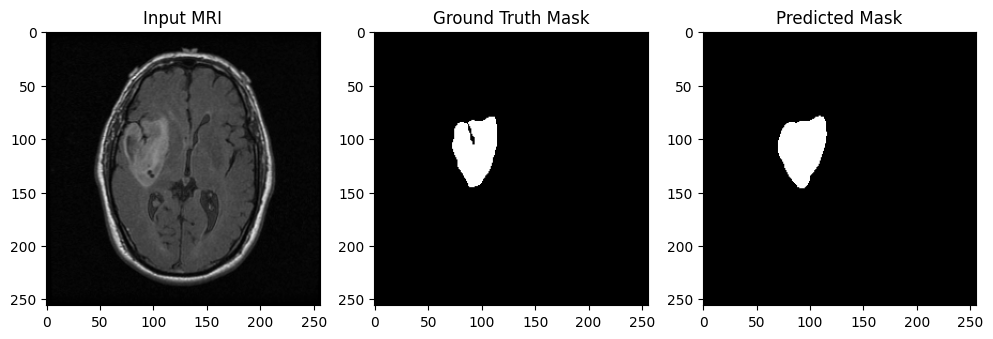

In [ ]:

import random

# Pick a random sample from validation set
idx = random.randint(0, len(X_val)-1)
test_img = X_val[idx]
true_mask = y_val[idx]

# Predict mask
pred_mask = model.predict(test_img[np.newaxis, ...])[0]

# Convert predicted mask to binary
pred_mask_bin = (pred_mask > 0.5).astype(np.uint8)

# Plot images
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(test_img.squeeze(), cmap='gray')
plt.title("Input MRI")

plt.subplot(1,3,2)
plt.imshow(true_mask.squeeze(), cmap='gray')
plt.title("Ground Truth Mask")

plt.subplot(1,3,3)
plt.imshow(pred_mask_bin.squeeze(), cmap='gray')
plt.title("Predicted Mask")

plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


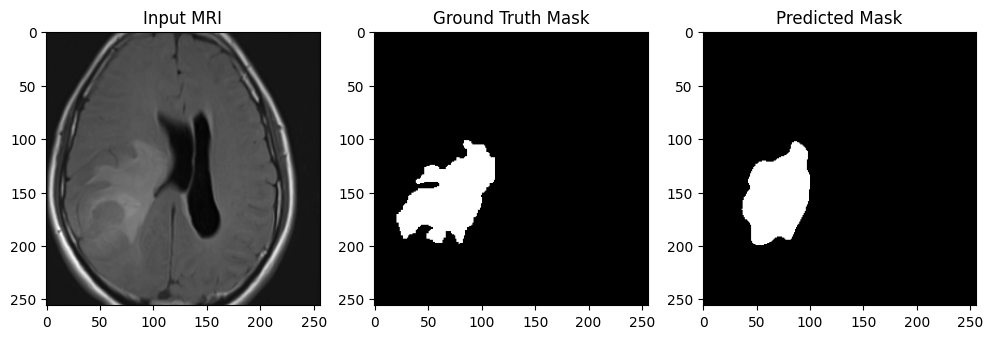

In [ ]:
import random

# Pick a random sample from validation set
idx = random.randint(0, len(X_val)-1)
test_img = X_val[idx]
true_mask = y_val[idx]

# Predict mask
pred_mask = model.predict(test_img[np.newaxis, ...])[0]

# Convert predicted mask to binary
pred_mask_bin = (pred_mask > 0.5).astype(np.uint8)

# Plot images
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(test_img.squeeze(), cmap='gray')
plt.title("Input MRI")

plt.subplot(1,3,2)
plt.imshow(true_mask.squeeze(), cmap='gray')
plt.title("Ground Truth Mask")

plt.subplot(1,3,3)
plt.imshow(pred_mask_bin.squeeze(), cmap='gray')
plt.title("Predicted Mask")

plt.show()


In [ ]:
model.save("brain_tumor_unetpp.h5")
